<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>
<h2>PYTHON PROJECT</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


In [134]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly
!pip install html5lib
!pip install lxml

In [135]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [136]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [137]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [138]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [139]:
tesla_data = tesla.history(period="max")

Question 1 Using Yfinance to extract stock data

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [140]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the requests library to download the webpage . Save the text of the response as a variable named html_data

In [141]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


url = "https://companiesmarketcap.com/tesla/revenue/"
html_data = requests.get(url).text

Parse the HTML Data using beautiful soup

In [142]:
soup = BeautifulSoup(html_data,"html.parser")

In [143]:
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [144]:
table = soup.find("table", {"class": "table"})  


year_column_index = None
revenue_column_index = None

headers = table.find_all("th")
for index, header in enumerate(headers):
    header_text = header.get_text().strip().lower()  
    if "year" in header_text:
        year_column_index = index
    elif "revenue" in header_text:
        revenue_column_index = index


if year_column_index is not None and revenue_column_index is not None:
    
    years = [row.find_all("td")[year_column_index].get_text().strip() for row in table.find_all("tr")[1:]]
    revenues = [row.find_all("td")[revenue_column_index].get_text().replace("$", "").replace("B", "").replace(",", "").strip() for row in table.find_all("tr")[1:]]

    
    Tesla_revenue = pd.DataFrame({"Year": years, "Revenue": revenues})

    
    print(Tesla_revenue)
else:
    print("Error: Could not find both 'Year' and 'Revenue' columns.")

          Year Revenue
0   2023 (TTM)   94.02
1         2022   81.46
2         2021   53.82
3         2020   31.53
4         2019   24.57
5         2018   21.46
6         2017   11.75
7         2016    7.00
8         2015    4.04
9         2014    3.19
10        2013    2.01
11        2012    0.41
12        2011    0.20
13        2010    0.11
14        2009    0.11


Display the last five rows of the tesla_revenue dataframe using tail function. upload a screenshot of the results 

In [145]:
Tesla_revenue.dropna(inplace=True)
Tesla_revenue.tail()

,Year,Revenue
10,2013,2.01
11,2012,0.41
12,2011,0.20
13,2010,0.11
14,2009,0.11


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [83]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [84]:
gme_data=gamestop.history(period="max")

Question 3 Use Yfinance to extract stock data 

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [85]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [86]:
import pandas as pd
from bs4 import BeautifulSoup






url="https://companiesmarketcap.com/gamestop/revenue/"
html_data=requests.get(url).text

Parse the html data using `beautiful_soup`.


In [87]:
soup = BeautifulSoup(html_data, 'html.parser')

In [88]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [69]:

table = soup.find("table", {"class": "table"})  # Update with the actual class or identifier

# Find the index of the "Year" and "Revenue" columns
year_column_index = None
revenue_column_index = None

headers = table.find_all("th")
for index, header in enumerate(headers):
    header_text = header.get_text().strip().lower()  # Convert to lowercase for case-insensitive comparison
    if "year" in header_text:
        year_column_index = index
    elif "revenue" in header_text:
        revenue_column_index = index

# Check if both "Year" and "Revenue" columns were found
if year_column_index is not None and revenue_column_index is not None:
    # Extract the data directly using list comprehensions
    years = [row.find_all("td")[year_column_index].get_text().strip() for row in table.find_all("tr")[1:]]
    revenues = [row.find_all("td")[revenue_column_index].get_text().replace("$", "").replace("B", "").replace(",", "").strip() for row in table.find_all("tr")[1:]]

    # Create a DataFrame
    gme_revenue = pd.DataFrame({"Year": years, "Revenue": revenues})

    # Print the DataFrame
    print(gme_revenue)
else:
    print("Error: Could not find both 'Year' and 'Revenue' columns.")

          Year Revenue
0   2023 (TTM)    5.78
1         2022    5.95
2         2021    5.87
3         2020    5.16
4         2019    7.33
5         2018    9.16
6         2017    8.76
7         2016    9.08
8         2015    9.31
9         2014    9.50
10        2013    8.91
11        2012    8.90
12        2011    9.66
13        2010    9.30
14        2009    9.04
15        2008    8.17
16        2007    6.53
17        2006    4.68
18        2005    2.13
19        2004    1.75
20        2003    1.47
21        2002    1.34


Question 4: Use Webscraping to extract GME revenue data Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [70]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Year,Revenue
17,2006,4.68
18,2005,2.13
19,2004,1.75
20,2003,1.47
21,2002,1.34


In [71]:
pip install matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [75]:
import yfinance as yf
import matplotlib.pyplot as plt

In [78]:
ticker = "TSLA"  
start_date = "2023-01-01"
end_date = "2023-07-31"

tesla_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Question 5 - Tesla Stock and Revenue Dashboard


use the make_graph function to graph the gamestock data, also provide a title 

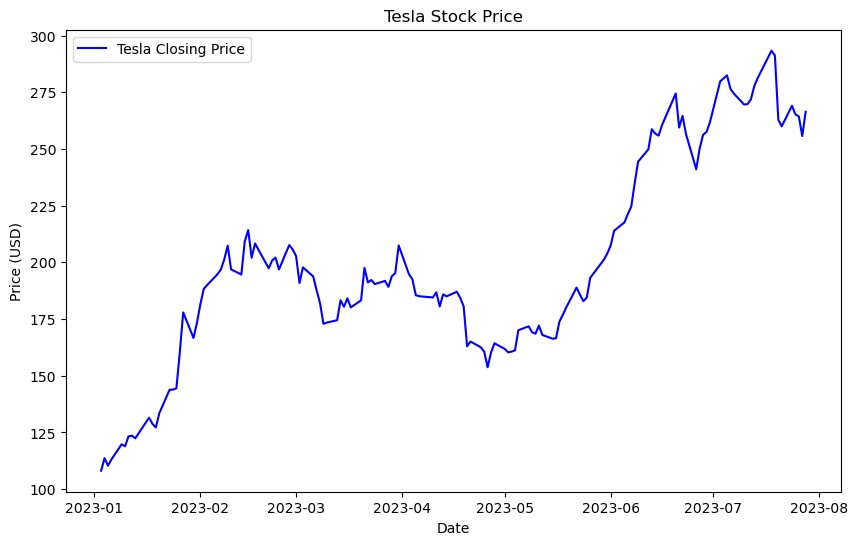

In [79]:
plt.figure(figsize=(10, 6))  


plt.plot(tesla_data['Close'], label="Tesla Closing Price", color='blue')


plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Tesla Stock Price")
plt.legend()


plt.show()

In [81]:
import yfinance as yf
import matplotlib.pyplot as plt

In [82]:
ticker = "GME"
start_date = "2023-01-01"
end_date = "2023-07-31"

gme_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Question 6: Plot GME stock data

use the make_graph function to graph the gamestock data, also provide a title 

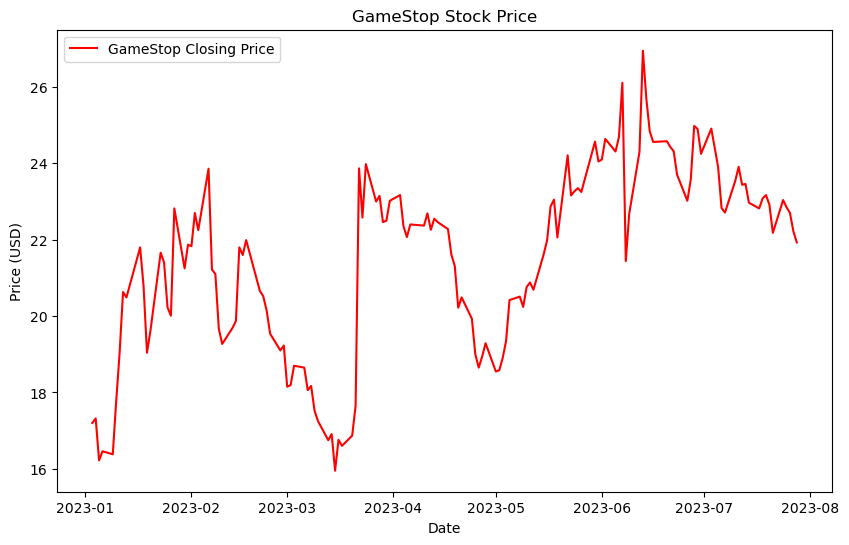

In [83]:
plt.figure(figsize=(10, 6))  


plt.plot(gme_data['Close'], label="GameStop Closing Price", color='red')


plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("GameStop Stock Price")
plt.legend()


plt.show()